In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.__version__

'0.25.3'

In [3]:
df = pd.DataFrame({'AAA': [4, 5, 6, 7],
                   'BBB': [10, 20, 30, 40],
                   'CCC': [100, 50, -30, -50]})

In [4]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [5]:
df.loc[df.AAA >= 5, 'BBB'] = -1

In [6]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,-1,50
2,6,-1,-30
3,7,-1,-50


In [7]:
df.loc[df.AAA >= 5, ['BBB', 'CCC']] = 555

In [8]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,555,555
2,6,555,555
3,7,555,555


In [9]:
df.loc[df.AAA < 5, ['BBB', 'CCC']] = 2000

In [10]:
df

,AAA,BBB,CCC
0,4,2000,2000
1,5,555,555
2,6,555,555
3,7,555,555


In [11]:
df_mask = pd.DataFrame({'AAA': [True] * 4,
                        'BBB': [False] * 4,
                        'CCC': [True, False] * 2})

In [12]:
df.where(df_mask, -1000)

,AAA,BBB,CCC
0,4,-1000,2000
1,5,-1000,-1000
2,6,-1000,555
3,7,-1000,-1000


In [13]:
df = pd.DataFrame({'AAA': [4, 5, 6, 7],
                   'BBB': [10, 20, 30, 40],
                    'CCC': [100, 50, -30, -50]})

In [14]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [15]:
df[df.AAA<=5]

,AAA,BBB,CCC
0,4,10,100
1,5,20,50


In [16]:
df[df.AAA>5]

,AAA,BBB,CCC
2,6,30,-30
3,7,40,-50


In [17]:
df = pd.DataFrame({'AAA': [4, 5, 6, 7],
                   'BBB': [10, 20, 30, 40],
                   'CCC': [100, 50, -30, -50]},
                   index=['foo', 'bar', 'boo', 'kar'])

In [18]:
df

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [19]:
df.loc['bar':'kar']

,AAA,BBB,CCC
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [20]:
df.iloc[0:3]

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
boo,6,30,-30


In [21]:
data = {'AAA': [4, 5, 6, 7],
        'BBB': [10, 20, 30, 40],
        'CCC': [100, 50, -30, -50]}

In [22]:
df2 = pd.DataFrame(data=data, index=[1, 2, 3, 4])

In [23]:
df2

,AAA,BBB,CCC
1,4,10,100
2,5,20,50
3,6,30,-30
4,7,40,-50


In [24]:
df2.iloc[1:3]

,AAA,BBB,CCC
2,5,20,50
3,6,30,-30


In [25]:
df2.loc[1:3]

,AAA,BBB,CCC
1,4,10,100
2,5,20,50
3,6,30,-30


### New Columns

In [26]:
df = pd.DataFrame({'AAA': [1, 2, 1, 3],
                   'BBB': [1, 1, 2, 2],
                   'CCC': [2, 1, 3, 1]})

In [27]:
df

,AAA,BBB,CCC
0,1,1,2
1,2,1,1
2,1,2,3
3,3,2,1


In [28]:
source_cols = df.columns

In [29]:
source_cols

Index(['AAA', 'BBB', 'CCC'], dtype='object')

In [30]:
new_cols = [str(x) + "_cat" for x in source_cols]

In [31]:
new_cols

['AAA_cat', 'BBB_cat', 'CCC_cat']

In [32]:
categories = {1: 'Alpha', 2: 'Beta', 3: 'Charlie'}

In [33]:
categories

{1: 'Alpha', 2: 'Beta', 3: 'Charlie'}

In [34]:
df[new_cols] = df[source_cols].applymap(categories.get)

In [35]:
df

,AAA,BBB,CCC,AAA_cat,BBB_cat,CCC_cat
0,1,1,2,Alpha,Alpha,Beta
1,2,1,1,Beta,Alpha,Alpha
2,1,2,3,Alpha,Beta,Charlie
3,3,2,1,Charlie,Beta,Alpha


In [36]:
df = pd.DataFrame({'AAA': [1, 1, 1, 2, 2, 2, 3, 3],
                   'BBB': [2, 1, 3, 4, 5, 1, 2, 3]})

In [37]:
df

,AAA,BBB
0,1,2
1,1,1
2,1,3
3,2,4
4,2,5
5,2,1
6,3,2
7,3,3


In [38]:
df.loc[df.groupby("AAA")["BBB"].idxmin()]

,AAA,BBB
1,1,1
5,2,1
6,3,2


In [39]:
df.sort_values(by="BBB").groupby("AAA", as_index=False).first()

,AAA,BBB
0,1,1
1,2,1
2,3,2


### Multi indexing

In [40]:
df = pd.DataFrame({'row': [0, 1, 2],
                   'One_X': [1.1, 1.1, 1.1],
                   'One_Y': [1.2, 1.2, 1.2],
                   'Two_X': [1.11, 1.11, 1.11],
                   'Two_Y': [1.22, 1.22, 1.22]})

In [41]:
df

,row,One_X,One_Y,Two_X,Two_Y
0,0,1.1,1.2,1.11,1.22
1,1,1.1,1.2,1.11,1.22
2,2,1.1,1.2,1.11,1.22


In [42]:
df = df.set_index('row')

In [43]:
df

,One_X,One_Y,Two_X,Two_Y
row,,,,
0,1.1,1.2,1.11,1.22
1,1.1,1.2,1.11,1.22
2,1.1,1.2,1.11,1.22


In [44]:
df.columns = pd.MultiIndex.from_tuples([tuple(c.split('_'))for c in df.columns])

In [45]:
df

One        Two      
       X    Y     X     Y
row                      
0    1.1  1.2  1.11  1.22
1    1.1  1.2  1.11  1.22
2    1.1  1.2  1.11  1.22

In [46]:
df = df.stack(0).reset_index(1)

In [47]:
df

,level_1,X,Y
row,,,
0,One,1.10,1.20
0,Two,1.11,1.22
1,One,1.10,1.20
1,Two,1.11,1.22
2,One,1.10,1.20
2,Two,1.11,1.22


In [48]:
df.columns = ['Sample', 'All_X', 'All_Y']

In [49]:
df

,Sample,All_X,All_Y
row,,,
0,One,1.10,1.20
0,Two,1.11,1.22
1,One,1.10,1.20
1,Two,1.11,1.22
2,One,1.10,1.20
2,Two,1.11,1.22


In [50]:
cols = pd.MultiIndex.from_tuples([(x, y) for x in ['A', 'B', 'C'] for y in ['O', 'I']])

In [51]:
df = pd.DataFrame(np.random.randn(2, 6), index=['n', 'm'], columns=cols)

In [52]:
df

A                   B                   C          
          O         I         O         I         O         I
n  0.077811 -0.240634 -0.554635  0.021751 -0.506388  1.900895
m  1.396341  1.187092 -0.855979  0.490215  1.653239  0.546639

In [53]:
df = df.div(df['C'], level=1)

In [54]:
df

A                   B              C     
          O         I         O         I    O    I
n -0.153659 -0.126590  1.095277  0.011443  1.0  1.0
m  0.844609  2.171621 -0.517759  0.896781  1.0  1.0

### Slicing

In [55]:
coords = [('AA', 'one'), ('AA', 'six'), ('BB', 'one'), ('BB', 'two'), ('BB', 'six')]

In [56]:
index = pd.MultiIndex.from_tuples(coords)

In [57]:
df = pd.DataFrame({'1st col': [0, 1, 2, 3, 4],
                   '2nd col': [6, 7, 8, 9, 10]}, index)

In [58]:
df

1st col  2nd col
AA one        0        6
   six        1        7
BB one        2        8
   two        3        9
   six        4       10

In [59]:
df.xs('BB', level=0, axis=0)

,1st col,2nd col
one,2,8
two,3,9
six,4,10


In [60]:
df.xs('six', level=1, axis=0)

,1st col,2nd col
AA,1,7
BB,4,10


In [61]:
import itertools

In [62]:
index = list(itertools.product(['Ada', 'Quinn', 'Violet'],['Comp', 'Math', 'Sci']))

In [63]:
headr = list(itertools.product(['Exams', 'Labs'], ['I', 'II']))

In [64]:
indx = pd.MultiIndex.from_tuples(index, names=['Student', 'Course'])

In [65]:
cols = pd.MultiIndex.from_tuples(headr) 

In [66]:
cols

MultiIndex([('Exams',  'I'),
            ('Exams', 'II'),
            ( 'Labs',  'I'),
            ( 'Labs', 'II')],
           )

In [67]:
data = [[70 + x + y + (x * y) % 3 for x in range(4)] for y in range(9)]

In [68]:
data

[[70, 71, 72, 73],
 [71, 73, 75, 74],
 [72, 75, 75, 75],
 [73, 74, 75, 76],
 [74, 76, 78, 77],
 [75, 78, 78, 78],
 [76, 77, 78, 79],
 [77, 79, 81, 80],
 [78, 81, 81, 81]]

In [69]:
df = pd.DataFrame(data, indx, cols)

In [70]:
df

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Comp      70  71   72  73
        Math      71  73   75  74
        Sci       72  75   75  75
Quinn   Comp      73  74   75  76
        Math      74  76   78  77
        Sci       75  78   78  78
Violet  Comp      76  77   78  79
        Math      77  79   81  80
        Sci       78  81   81  81

In [71]:
All = slice(None)

In [72]:
df.loc['Violet']

Exams     Labs    
           I  II    I  II
Course                   
Comp      76  77   78  79
Math      77  79   81  80
Sci       78  81   81  81

In [73]:
df.loc[(All, 'Math'), All]

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Math      71  73   75  74
Quinn   Math      74  76   78  77
Violet  Math      77  79   81  80

In [74]:
 df.loc[(slice('Ada', 'Quinn'), 'Math'), All]

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Math      71  73   75  74
Quinn   Math      74  76   78  77

In [75]:
df.loc[(All, 'Math'), ('Exams')]

,,I,II
Student,Course,,
Ada,Math,71,73
Quinn,Math,74,76
Violet,Math,77,79


In [76]:
df.loc[(All, 'Math'), (All, 'II')]

,,Exams,Labs
,,II,II
Student,Course,,
Ada,Math,73,74
Quinn,Math,76,77
Violet,Math,79,80


### Sorting

In [77]:
df.sort_values(by=('Labs', 'II'), ascending=False)

Exams     Labs    
                   I  II    I  II
Student Course                   
Violet  Sci       78  81   81  81
        Math      77  79   81  80
        Comp      76  77   78  79
Quinn   Sci       75  78   78  78
        Math      74  76   78  77
        Comp      73  74   75  76
Ada     Sci       72  75   75  75
        Math      71  73   75  74
        Comp      70  71   72  73

### Missing Data

In [78]:
df = pd.DataFrame(np.random.randn(6, 1),
                  index=pd.date_range('2013-08-01', periods=6, freq='B'),
                  columns=list('A'))

In [79]:
df

,A
2013-08-01,1.364225
2013-08-02,1.496873
2013-08-05,2.111226
2013-08-06,-1.876434
2013-08-07,1.914988
2013-08-08,0.066125


In [80]:
df.loc[df.index[3], 'A'] = np.nan

In [81]:
df

,A
2013-08-01,1.364225
2013-08-02,1.496873
2013-08-05,2.111226
2013-08-06,NaN
2013-08-07,1.914988
2013-08-08,0.066125


In [82]:
df.reindex(df.index[::-1]).ffill()

,A
2013-08-08,0.066125
2013-08-07,1.914988
2013-08-06,1.914988
2013-08-05,2.111226
2013-08-02,1.496873
2013-08-01,1.364225


### Grouping

In [83]:
df = pd.DataFrame({'animal': 'cat dog cat fish dog cat cat'.split(),
                   'size': list('SSMMMLL'),
                   'weight': [8, 10, 11, 1, 20, 12, 12],
                   'adult': [False] * 5 + [True] * 2})

In [84]:
df

,animal,size,weight,adult
0,cat,S,8,False
1,dog,S,10,False
2,cat,M,11,False
3,fish,M,1,False
4,dog,M,20,False
5,cat,L,12,True
6,cat,L,12,True


In [85]:
df.groupby('animal').apply(lambda subf: subf['size'][subf['weight'].idxmax()])

animal
cat     L
dog     M
fish    M
dtype: object

In [86]:
gb = df.groupby(['animal'])

In [87]:
gb.get_group('cat')

,animal,size,weight,adult
0,cat,S,8,False
2,cat,M,11,False
5,cat,L,12,True
6,cat,L,12,True


In [88]:
### apply to different items in a group
def GrowUp(x):
    avg_weight = sum(x[x['size'] == 'S'].weight * 1.5)
    avg_weight += sum(x[x['size'] == 'M'].weight * 1.25)
    avg_weight += sum(x[x['size'] == 'L'].weight)
    avg_weight /= len(x)
    return pd.Series(['L', avg_weight, True],index=['size', 'weight', 'adult'])

In [89]:
expected_df = gb.apply(GrowUp)

In [90]:
expected_df

,size,weight,adult
animal,,,
cat,L,12.4375,True
dog,L,20.0000,True
fish,L,1.2500,True


### Merge

In [91]:
rng = pd.date_range('2000-01-01', periods=6)

In [92]:
df1 = pd.DataFrame(np.random.randn(6, 3), index=rng, columns=['A', 'B', 'C'])

In [93]:
df2 = df1.copy()

In [94]:
df = df1.append(df2, ignore_index=True)

In [95]:
df

,A,B,C
0,-1.123013,0.760146,0.515516
1,0.495417,1.383822,1.896050
2,-0.642877,-0.356481,-0.115577
3,-0.386658,0.340455,-0.648465
4,2.330446,0.413409,-0.021106
5,-1.429873,-1.708001,-1.195348
6,-1.123013,0.760146,0.515516
7,0.495417,1.383822,1.896050
8,-0.642877,-0.356481,-0.115577
9,-0.386658,0.340455,-0.648465


### Reading multiple files to create a single DataFrame

In [96]:
for i in range(3):
    data = pd.DataFrame(np.random.randn(10, 4))
    data.to_csv('file_{}.csv'.format(i))

In [97]:
files = ['file_0.csv', 'file_1.csv', 'file_2.csv']

In [98]:
result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

In [99]:
result

,Unnamed: 0,0,1,2,3
0,0,0.329378,0.885785,-1.203703,0.990259
1,1,0.245702,1.257260,-0.240781,0.535576
2,2,-0.261369,1.001675,0.596412,1.398795
3,3,-1.614538,-0.736661,1.088466,0.864428
4,4,0.862610,-0.298353,0.679552,-1.476224
5,5,0.333042,0.957988,-0.012657,-0.798242
6,6,-0.363340,-0.909460,0.277967,1.788789
7,7,-2.356839,0.393827,0.518573,-0.226565
8,8,0.232941,0.538623,-0.875507,0.125563
9,9,-1.340505,1.520861,1.823573,-0.630761


In [100]:
### Daniel Chen: Cleaning and Tidying Data in Pandas | PyData DC 2018

### https://www.youtube.com/watch?v=iYie42M1ZyU&t=1256s

In [101]:
pd.read_csv('../data/gapminder.tsv', sep='\t')

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [102]:
df = pd.read_csv('../data/gapminder.tsv', sep='\t')

In [103]:
type(df)

pandas.core.frame.DataFrame

In [104]:
df.shape    # shape is an attribute

(1704, 6)

In [105]:
df.info()    # info is a method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [106]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [107]:
df.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [108]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [109]:
df.index

RangeIndex(start=0, stop=1704, step=1)

In [110]:
df.values

array([['Afghanistan', 'Asia', 1952, 28.801, 8425333, 779.4453145],
       ['Afghanistan', 'Asia', 1957, 30.331999999999997, 9240934,
        820.8530296],
       ['Afghanistan', 'Asia', 1962, 31.997, 10267083, 853.1007099999999],
       ...,
       ['Zimbabwe', 'Africa', 1997, 46.809, 11404948, 792.4499602999999],
       ['Zimbabwe', 'Africa', 2002, 39.989000000000004, 11926563,
        672.0386227000001],
       ['Zimbabwe', 'Africa', 2007, 43.486999999999995, 12311143,
        469.70929810000007]], dtype=object)

In [111]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [112]:
country = df['country']

In [113]:
country

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [114]:
type(country)

pandas.core.series.Series

In [115]:
country = df[['country']]

In [116]:
country

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
...,...
1699,Zimbabwe
1700,Zimbabwe
1701,Zimbabwe
1702,Zimbabwe


In [117]:
df_dropped = df.drop(['continent','country'], axis='columns')

In [118]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [119]:
df.loc[0]

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

In [120]:
df.loc[[0,1]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030


In [121]:
df.iloc[[0,1,-1]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [122]:
subset = df.loc[:,['year','pop']]

In [123]:
subset.head()

,year,pop
0,1952,8425333
1,1957,9240934
2,1962,10267083
3,1967,11537966
4,1972,13079460


In [124]:
subset = df.iloc[:,[2,4]]

In [125]:
subset.head()

,year,pop
0,1952,8425333
1,1957,9240934
2,1962,10267083
3,1967,11537966
4,1972,13079460


In [126]:
df.loc[df['country'] == 'United States']

,country,continent,year,lifeExp,pop,gdpPercap
1608,United States,Americas,1952,68.440,157553000,13990.48208
1609,United States,Americas,1957,69.490,171984000,14847.12712
1610,United States,Americas,1962,70.210,186538000,16173.14586
1611,United States,Americas,1967,70.760,198712000,19530.36557
1612,United States,Americas,1972,71.340,209896000,21806.03594
1613,United States,Americas,1977,73.380,220239000,24072.63213
1614,United States,Americas,1982,74.650,232187835,25009.55914
1615,United States,Americas,1987,75.020,242803533,29884.35041
1616,United States,Americas,1992,76.090,256894189,32003.93224
1617,United States,Americas,1997,76.810,272911760,35767.43303


In [127]:
df.loc[(df['country'] == 'United States') & (df['year'] == '1982')]

/usr/local/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,country,continent,year,lifeExp,pop,gdpPercap


In [128]:
df.iloc[1614]

country      United States
continent         Americas
year                  1982
lifeExp              74.65
pop              232187835
gdpPercap          25009.6
Name: 1614, dtype: object

In [129]:
df.groupby(['year'])['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [130]:
import numpy as np
df.groupby(['year'])['lifeExp'].agg(np.mean)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [131]:
df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].agg(np.mean)

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

In [132]:
df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].agg(np.mean).reset_index()

,year,continent,lifeExp,gdpPercap
0,1952,Africa,39.135500,1252.572466
1,1952,Americas,53.279840,4079.062552
2,1952,Asia,46.314394,5195.484004
3,1952,Europe,64.408500,5661.057435
4,1952,Oceania,69.255000,10298.085650
5,1957,Africa,41.266346,1385.236062
6,1957,Americas,55.960280,4616.043733
7,1957,Asia,49.318544,5787.732940
8,1957,Europe,66.703067,6963.012816
9,1957,Oceania,70.295000,11598.522455


### Column headers are values, not variable names

In [133]:
pew = pd.read_csv('../data/pew.csv')

In [134]:
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [135]:
pew.shape

(18, 11)

In [136]:
pew.melt(id_vars='religion')

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [137]:
pew_tidy = pew.melt(id_vars='religion', var_name='income', value_name='count')

In [138]:
pew_tidy

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [139]:
billboard = pd.read_csv('../data/billboard.csv')

In [140]:
billboard.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
billboard.melt(id_vars=['year','artist','track','time','date.entered'],
               var_name='week',
               value_name='rank') 

,year,artist,track,time,date.entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [142]:
(
 billboard
  .melt(id_vars=['year','artist','track','time','date.entered'],
        var_name='week',
        value_name='rank')
  .groupby('artist')['rank']
  .mean()
)

artist
2 Pac               85.428571
2Ge+her             90.000000
3 Doors Down        37.602740
504 Boyz            56.222222
98^0                37.650000
                      ...    
Yankee Grey         83.125000
Yearwood, Trisha    84.166667
Ying Yang Twins     88.857143
Zombie Nation       99.000000
matchbox twenty     18.641026
Name: rank, Length: 228, dtype: float64

### Multiple Variables are stored in one column

In [143]:
ebola = pd.read_csv('../data/country_timeseries.csv')

In [144]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [145]:
ebola.shape

(122, 18)

In [146]:
ebola_long = ebola.melt(id_vars=['Date','Day'],var_name='cd_country',value_name='count')

In [147]:
ebola_long

,Date,Day,cd_country,count
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0
...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN
1948,3/26/2014,4,Deaths_Mali,NaN
1949,3/25/2014,3,Deaths_Mali,NaN
1950,3/24/2014,2,Deaths_Mali,NaN


In [148]:
ebola_split = ebola_long['cd_country'].str.split('_',expand=True)

In [149]:
ebola_split

,0,1
0,Cases,Guinea
1,Cases,Guinea
2,Cases,Guinea
3,Cases,Guinea
4,Cases,Guinea
...,...,...
1947,Deaths,Mali
1948,Deaths,Mali
1949,Deaths,Mali
1950,Deaths,Mali


In [150]:
ebola_long[['status','country']] = ebola_split

In [151]:
ebola_long.head()

,Date,Day,cd_country,count,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea


### variables are stored in both rows and columns

In [152]:
weather = pd.read_csv('../data/weather.csv')

In [153]:
weather.head()

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
weather_long = weather.melt(id_vars=['id','year','month','element'],
                            var_name='day',
                            value_name='temp')

In [155]:
weather_long.head()

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN


In [156]:
weather_long.pivot_table(index=['id','year','month','day'],
                         columns='element',
                         values='temp').reset_index()

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4
5,MX17004,2010,3,d10,34.5,16.8
6,MX17004,2010,3,d16,31.1,17.6
7,MX17004,2010,3,d5,32.1,14.2
8,MX17004,2010,4,d27,36.3,16.7
9,MX17004,2010,5,d27,33.2,18.2


In [157]:
df_new = pd.DataFrame({
    'a':[10,20,30],
    'b':[20,30,40]
})

In [158]:
df_new

,a,b
0,10,20
1,20,30
2,30,40


In [159]:
def avg_2_mod(x,y):
    if (x==20):
        return np.NaN
    else:
        return (x+y)/2      

In [160]:
import numpy as np

In [161]:
avg_2_mod_vec = np.vectorize(avg_2_mod)

In [162]:
avg_2_mod_vec(df_new['a'],df_new['b'])

array([15., nan, 35.])

In [163]:
# For pythonic programming, you can use the decorator
@np.vectorize
def avg_2_mod(x,y):
    if (x==20):
        return np.NaN
    else:
        return (x+y)/2  

In [164]:
avg_2_mod(df_new['a'],df_new['b'])

array([15., nan, 35.])

In [165]:
import numba

In [166]:
@numba.vectorize
def avg_2_mod_numba(x,y):
    if (x==20):
        return np.NaN
    else:
        return (x+y)/2  

In [167]:
avg_2_mod_numba(df_new['a'],df_new['b'])

ValueError: cannot determine Numba type of <class 'pandas.core.series.Series'>

In [168]:
# to get the numpy expression of a column, use the values function
df_new['a'].values

array([10, 20, 30])

In [169]:
avg_2_mod_numba(df_new['a'].values,df_new['b'].values)

array([15., nan, 35.])

In [170]:
def avg_2(x,y):
    return (x+y)/2

In [171]:
%%timeit
avg_2(df_new['a'],df_new['b'])

241 µs ± 7.13 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [172]:
%%timeit
avg_2_mod(df_new['a'],df_new['b'])

140 µs ± 10.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [173]:
%%timeit
avg_2_mod_numba(df_new['a'].values,df_new['b'].values)

5.32 µs ± 276 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [174]:
import seaborn as sns

In [175]:
tips = sns.load_dataset('tips')

In [176]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [177]:
import matplotlib.pyplot as plt

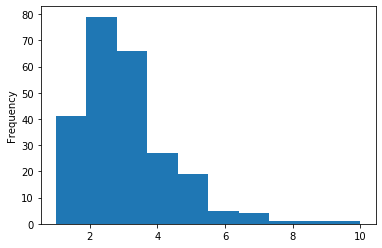

In [178]:
tips.tip.plot(kind='hist')
plt.show()

In [179]:
cts = tips.smoker.value_counts()
cts

No     151
Yes     93
Name: smoker, dtype: int64

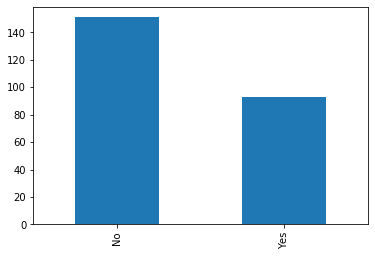

In [180]:
cts.plot(kind='bar')

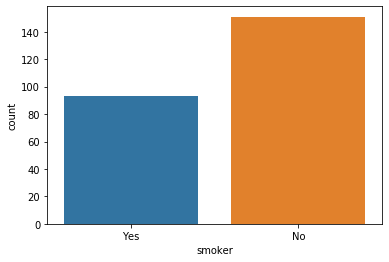

In [181]:
sns.countplot(x='smoker',data=tips)

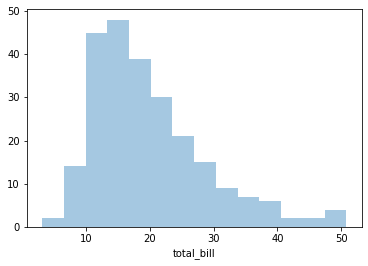

In [182]:
sns.distplot(tips.total_bill, kde=False)

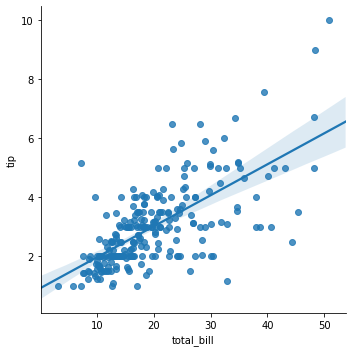

In [183]:
sns.lmplot(x='total_bill',y='tip', data=tips)

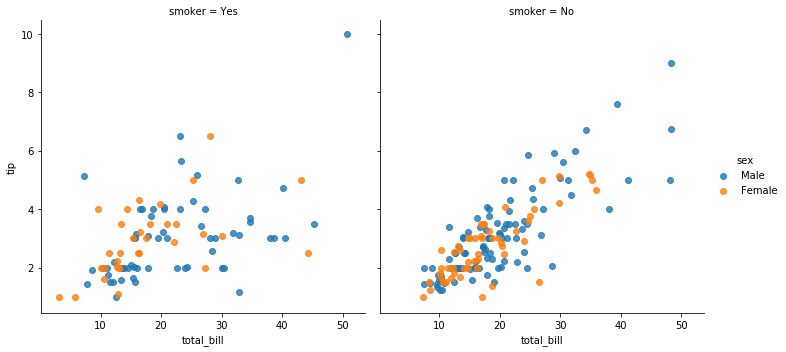

In [184]:
sns.lmplot(x='total_bill',y='tip', data=tips, hue='sex', fit_reg=False, col='smoker')

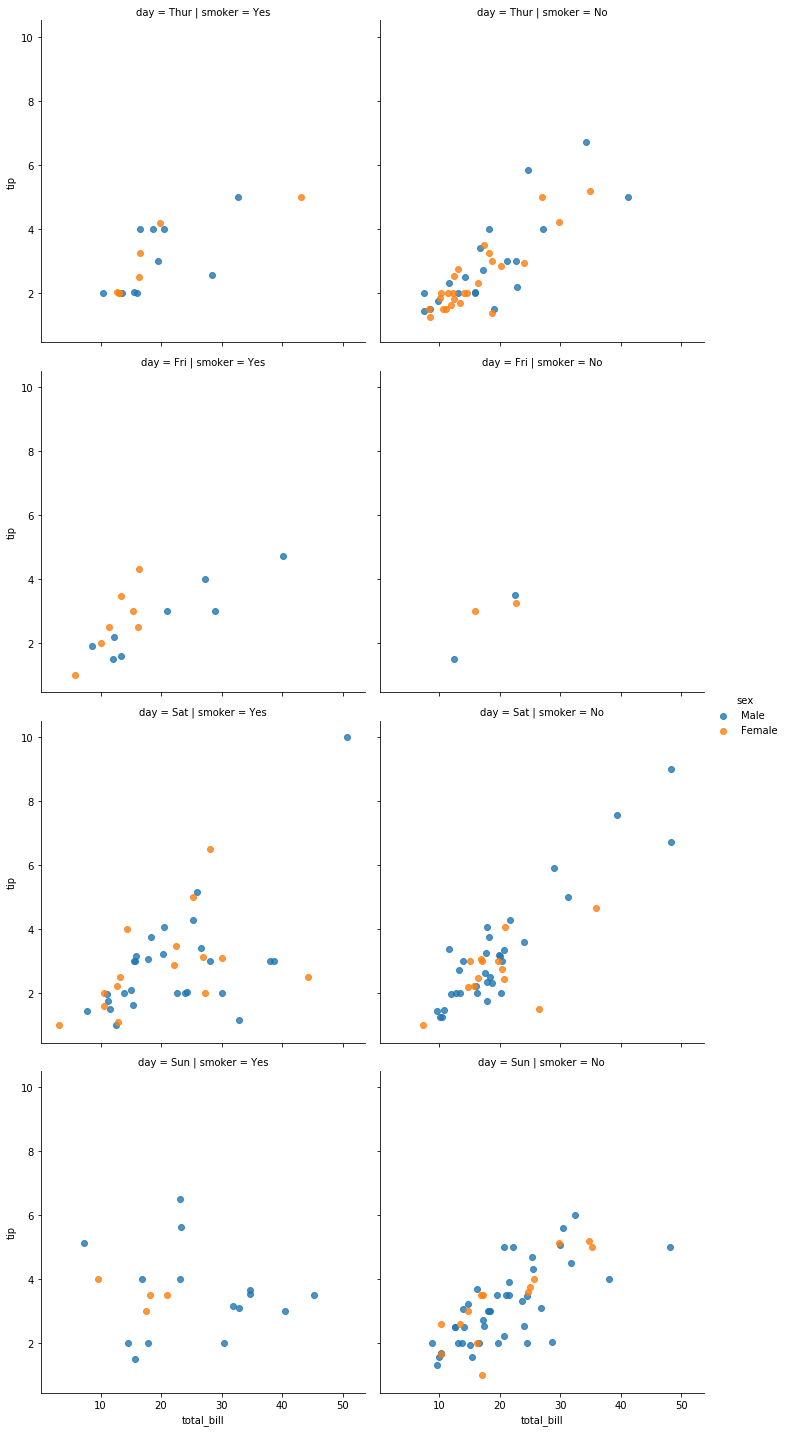

In [186]:
sns.lmplot(x='total_bill',y='tip', data=tips, hue='sex', fit_reg=False, col='smoker', row='day')

In [187]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

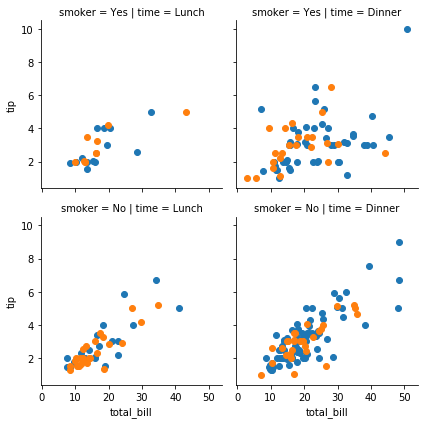

In [188]:
facet = sns.FacetGrid(tips,col='time',row='smoker', hue='sex')
facet.map(plt.scatter, 'total_bill', 'tip')

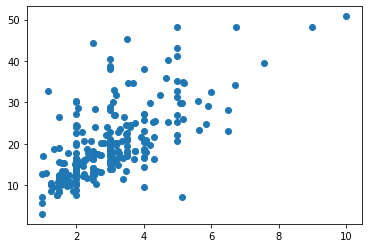

In [189]:
fig, ax = plt.subplots(1,1)
ax.scatter(tips.tip, tips.total_bill)

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

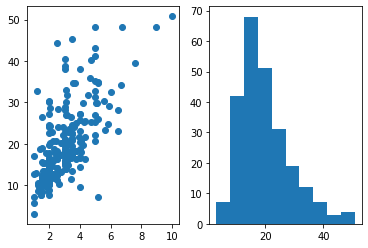

In [190]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.scatter(tips.tip, tips.total_bill)
ax2.hist(tips.total_bill)

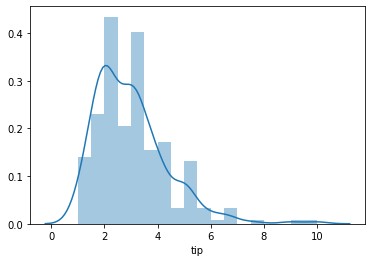

In [191]:
dis=sns.distplot(tips.tip)

In [192]:
type(dis)

matplotlib.axes._subplots.AxesSubplot

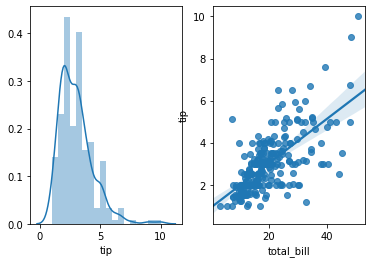

In [193]:
fig, (ax1,ax2) = plt.subplots(1,2)
sns.distplot(tips.tip, ax=ax1)
sns.regplot(x='total_bill',y='tip',data=tips, ax=ax2)